# DROP NOTICES, CALCULATE CHANGE EACH QUARTER

In [1]:
import pandas as pd

df = pd.read_csv("data/scrape_parsed.csv") # parsed 13f filings
df.head(3)

C:\Users\ersin\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ersin\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
C:\Users\ersin\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


,cik,cusip,shares,rdate,fdate,filetype
0,354204,00036020,164620.0,19990331,19990513,13F-HR
1,913414,00036020,129288.0,19990331,19990513,13F-HR
2,884589,00036020,199400.0,19990331,19990512,13F-HR


In [2]:
df.shape

(48719087, 6)

In [3]:
filing_type_counts = df['filetype'].value_counts()


mpl.rcParams.update({
        "font.size":16,
        "font.weight": "normal",  # bold fonts
        "lines.linewidth": 2,   # thick lines
        "lines.color": "k",     # black lines
        "grid.color": "0.5",    # gray gridlines
        "grid.linestyle": "-",  # solid gridlines
        "grid.linewidth": 0.5,  # thin gridlines
        "savefig.dpi": 300,     # higher resolution output.
    })

plt.figure(figsize=(15, 7))  # Adjust the size as needed
bars = plt.bar(filing_type_counts.index, filing_type_counts.values)  # You can choose a different color

# Calculate the total count for percentages
total = sum(filing_type_counts.values)

# Adding percentages on top of the bars
for bar in bars:
    yval = bar.get_height()
    percentage = f'{100 * yval/total:.1f}%'  # Format the percentage
    plt.text(bar.get_x() + bar.get_width()/2, yval, percentage, ha='center', va='bottom')

plt.xlabel('Filing Type')
plt.ylabel('Count')
plt.title('Value Counts of Filing Types')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
plt.show()
"""
plt.figure(figsize=(15, 5))  # Adjust the size as needed
plt.bar(filing_type_counts.index, filing_type_counts.values)  # You can choose a different color
plt.xlabel('Filing Type')
plt.ylabel('Count')
plt.title('Value Counts of Filing Types')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
plt.show()
"""

NameError: name 'mpl' is not defined

In [ ]:
df.cik.value_counts()

In [ ]:
df.cusip.value_counts()

In [ ]:
df.describe()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


rdate_counts = df['rdate'].value_counts()
rdate_counts = rdate_counts.sort_index()



In [ ]:
rdate_counts

In [ ]:
print(rdate_counts)
rdate_counts.shape

In [ ]:
summary = pd.DataFrame({
    'Column': ['cik', 'cusip', 'shares', 'rdate', 'fdate', 'filetype'],
    'Example Data': [df[col].iloc[0] for col in ['cik', 'cusip', 'shares', 'rdate', 'fdate', 'filetype']],
    'Unique Value Count': [df[col].nunique() for col in ['cik', 'cusip', 'shares', 'rdate', 'fdate', 'filetype']],
    'Minimum': [df[col].min() for col in ['cik', 'cusip', 'shares', 'rdate', 'fdate', 'filetype']],
    'Maximum': [df[col].max() for col in ['cik', 'cusip', 'shares', 'rdate', 'fdate', 'filetype']]
})

print(summary.to_latex(index=False))

In [ ]:
print(df.describe().to_latex(index=False))

In [ ]:
#  calculate differences each timestamp

In [6]:
import time

start = time.time()

df.sort_values(['cik',"cusip", 'rdate'], inplace=True)
df['diffs'] = df.groupby(['cik',"cusip"])['shares'].diff()

end = time.time()
print("Elapsed time: {}".format(end - start))

Elapsed time: 33.640674114227295


C:\Users\ersin\AppData\Local\Temp\ipykernel_29996\3045144283.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, percentages[i] + 1, f"{v} items", ha='center', va='bottom', fontweight='bold')


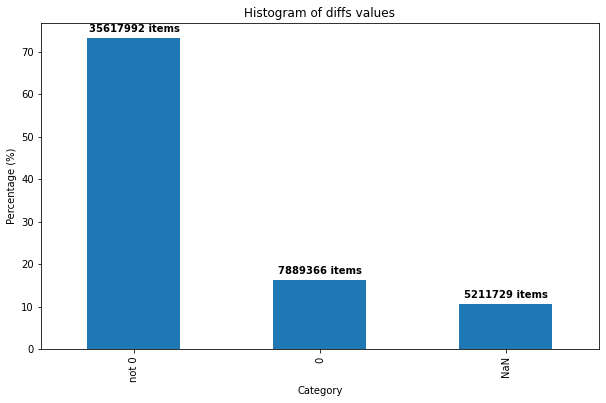

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Categorize the 'diffs' column
def categorize(val):
    if pd.isna(val):
        return 'NaN'
    elif val == 0:
        return '0'
    else:
        return 'not 0'

df['category'] = df['diffs'].apply(categorize)

# Calculate the value counts and percentages
value_counts = df['category'].value_counts()
total = len(df['category'])
percentages = (value_counts / total) * 100

# Plotting the histogram with percentages
percentages.plot(kind='bar')
plt.title('Histogram of diffs values')
plt.ylabel('Percentage (%)')
plt.xlabel('Category')

# Annotate the bars with the count of items in each category
for i, v in enumerate(value_counts):
    plt.text(i, percentages[i] + 1, f"{v} items", ha='center', va='bottom', fontweight='bold')

plt.show()


More than 5m null values. This is because "diffs" column is created with rolling window aproach, and first appearance of a symbol is always NaN. Because there are no item to create a value for a difference yet. We can see percentage of NaN values in each quarter.

We can drop records where difference equals 0. It may occur if issuers does not change amount of their holdings between quarters.


In [8]:
series = df.groupby('rdate').apply(lambda x: x.diffs.isnull().sum()/len(x))

# percentage of nan values in each quarter
series.sort_values(ascending=False).head(10)

rdate
19990331    1.000000
19990630    0.329424
19991231    0.191454
20000331    0.176775
19990930    0.173817
20000630    0.170027
20001231    0.156257
20010331    0.150297
20000930    0.145340
20061231    0.143283
dtype: float64

To minimize information risk:

- drop all items where rdate 19990331 because there are 0 change in value in the first timeframe.
- for remainin nan values, replace nan values with current number of shares
- also drop rows with 0 diffs since it does not mean any interaction happened that timestamp.

In [9]:
df.head(3)

,cik,cusip,shares,rdate,fdate,filetype,diffs,category
491956,2110,19990810,0.0,19990630,19990810,13F-NT,NaN,NaN
35055712,2230,00120410,145000.0,20131231,20140214,13F-HR,NaN,NaN
35832179,2230,00120410,145000.0,20140331,20140423,13F-HR,0.0,0


# CALCULATE DELAY

In [10]:
df

,cik,cusip,shares,rdate,fdate,filetype,diffs,category
491956,2110,19990810,0.0,19990630,19990810,13F-NT,NaN,NaN
35055712,2230,00120410,145000.0,20131231,20140214,13F-HR,NaN,NaN
35832179,2230,00120410,145000.0,20140331,20140423,13F-HR,0.0,0
36625994,2230,00120410,145000.0,20140630,20140731,13F-HR,0.0,0
37441087,2230,00120410,145000.0,20140930,20141021,13F-HR,0.0,0
...,...,...,...,...,...,...,...,...
48597748,1723681,90781810,1747.0,20170930,20171208,13F-HR,NaN,NaN
48606189,1723681,91324P10,2916.0,20170930,20171208,13F-HR,NaN,NaN
48636846,1723681,93114210,3608.0,20170930,20171208,13F-HR,NaN,NaN
48645390,1723681,94974610,7530.0,20170930,20171208,13F-HR,NaN,NaN


In [11]:
# Ensure that 'rdate' and 'fdate' are in datetime format
df['rdate'] = pd.to_datetime(df['rdate'], format='%Y%m%d')
df['fdate'] = pd.to_datetime(df['fdate'], format='%Y%m%d')

# Calculate the delay
df['delay'] = (df['fdate'] - df['rdate']).dt.days

In [12]:
df.head()

,cik,cusip,shares,rdate,fdate,filetype,diffs,category,delay
491956,2110,19990810,0.0,1999-06-30,1999-08-10,13F-NT,NaN,NaN,41
35055712,2230,00120410,145000.0,2013-12-31,2014-02-14,13F-HR,NaN,NaN,45
35832179,2230,00120410,145000.0,2014-03-31,2014-04-23,13F-HR,0.0,0,23
36625994,2230,00120410,145000.0,2014-06-30,2014-07-31,13F-HR,0.0,0,31
37441087,2230,00120410,145000.0,2014-09-30,2014-10-21,13F-HR,0.0,0,21


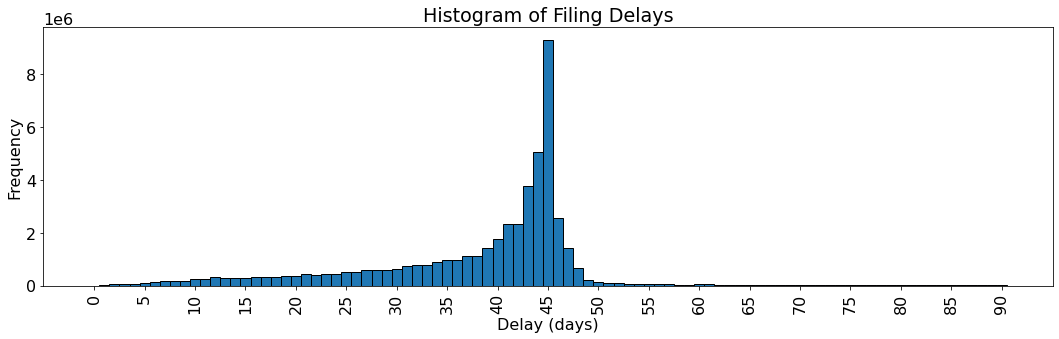

In [13]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams.update({
        "font.size":16,
        "font.weight": "normal",  # bold fonts
        "lines.linewidth": 2,   # thick lines
        "lines.color": "k",     # black lines
        "grid.color": "0.5",    # gray gridlines
        "grid.linestyle": "-",  # solid gridlines
        "grid.linewidth": 0.5,  # thin gridlines
        "savefig.dpi": 300,     # higher resolution output.
    })

# Get the counts of each unique delay value
delay_counts = df['delay'].value_counts().sort_index()
# Set the figure size to make the plot wider
plt.figure(figsize=(15, 5))  # Width, Height in inches

# Plot the histogram
plt.bar(delay_counts.index, delay_counts.values, width=1.0, edgecolor='black')

# Set the x-axis labels with a step of 5
plt.xticks(range(min(delay_counts.index), max(delay_counts.index) + 1, 5), rotation=90)

# Set the labels and title
plt.xlabel('Delay (days)')
plt.ylabel('Frequency')
plt.title('Histogram of Filing Delays')

# Show the plot
plt.tight_layout()  # Adjust the padding between and around subplots.

plt.show()




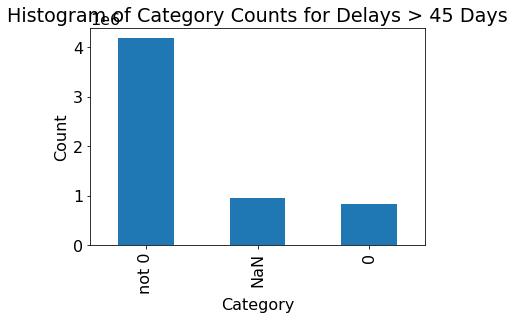

In [14]:

# Filter the DataFrame for delays greater than 45 days
df_delayed = df[df['delay'] > 45]

# Get the counts of each unique category value for the filtered DataFrame
category_counts = df_delayed['category'].value_counts()

# Plot the histogram
category_counts.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Histogram of Category Counts for Delays > 45 Days')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

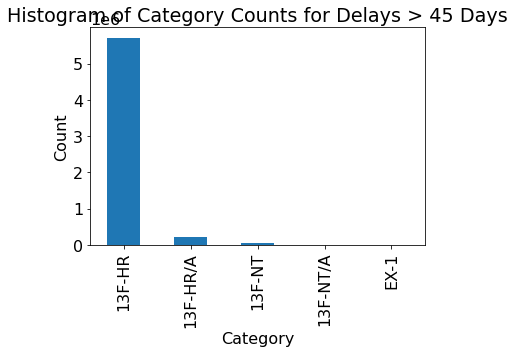

In [15]:
category_counts = df_delayed['filetype'].value_counts()

# Plot the histogram
category_counts.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Histogram of Category Counts for Delays > 45 Days')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

# CLEAN DATA, AND BUCKET DIFFERENCES

In [16]:
# We make sure filetype and missing data has a systematic error.

# Thus we continue to process them by doing following things:

To minimize information risk:

- drop all items where rdate 19990331 because there are 0 change in value in the first timeframe. (we calc it before)
- for remainin nan values, replace nan values with current number of shares
- also drop rows with 0 diffs since it does not mean any interaction happened that timestamp.

In [17]:
# Convert the integer to a datetime for comparison
cutoff_date = pd.to_datetime('19990331', format='%Y%m%d')

# Drop rows where 'rdate' is less than or equal to the cutoff date
df = df.drop(df[df.rdate <= cutoff_date].index)

# Fill in missing 'diffs' values with 'shares' values
df['diffs'] = df['diffs'].fillna(df['shares'])

# Drop rows where 'diffs' is equal to 0
df = df.drop(df[df['diffs'] == 0].index)

# Check for NaN values
nan_counts = df.isna().sum()
print(nan_counts)



cik         0
cusip       0
shares      0
rdate       0
fdate       0
filetype    0
diffs       0
category    0
delay       0
dtype: int64


In [18]:
nan_counts = df.isna().sum()
print(nan_counts)

cik         0
cusip       0
shares      0
rdate       0
fdate       0
filetype    0
diffs       0
category    0
delay       0
dtype: int64


# NORMALIZE CHANGE VALUES INTO CATEGORICAL BUCKETS

In order to make data more interpretable, we need to convert diff values (which are change in number of stocks for each investor in that quarter) into categorical values.

Main issue here is each number of stocks represent different values, since each stock has different value.

Therefore, we need to group stocks, infer their distribution, and bucket values accordingly.


It is kinda complex, i tried a few stuff but this approach give best:
    
    -  for each group of cusips, split positive and negative
    -  within each group, identify significant buy and sales by %5 and %95th values
    - and splitted by neutral, buy, large buy by sorted

In [19]:
import pandas as pd
import numpy as np

def categorize_diffs(group):
    # Initialize the category column
    group['category'] = 'Neutral'  # Default category
    
    # Separate the group into negative and positive diffs
    negative_diffs = group[group['diffs'] < 0]['diffs']
    positive_diffs = group[group['diffs'] > 0]['diffs']
    
    # Check if there are enough negative diffs to calculate quantiles
    if len(negative_diffs.dropna()) > 1:
        significant_sale_threshold = negative_diffs.quantile(0.05)
        negative_quantiles = negative_diffs.quantile([0.05, 1/3, 2/3]).tolist()
        negative_bins = sorted(set([-np.inf] + negative_quantiles + [0]))
        negative_labels = ['Significant Sale', 'Large Sale', 'Sale', 'Neutral'][:len(negative_bins)-1]
        group.loc[negative_diffs.index, 'category'] = pd.cut(negative_diffs, bins=negative_bins, labels=negative_labels, include_lowest=True)
    
    # Check if there are enough positive diffs to calculate quantiles
    if len(positive_diffs.dropna()) > 1:
        significant_buy_threshold = positive_diffs.quantile(0.95)
        positive_quantiles = positive_diffs.quantile([1/3, 2/3, 0.95]).tolist()
        positive_bins = sorted(set([0] + positive_quantiles + [np.inf]))
        positive_labels = ['Neutral', 'Buy', 'Large Buy', 'Significant Buy'][:len(positive_bins)-1]
        group.loc[positive_diffs.index, 'category'] = pd.cut(positive_diffs, bins=positive_bins, labels=positive_labels, include_lowest=True)
    
    return group

# Apply the function to each group
df_categorized = df.groupby('cusip').apply(categorize_diffs)

# Reset index if necessary
df_categorized.reset_index(drop=True, inplace=True)




In [20]:
df_categorized.head()

,cik,cusip,shares,rdate,fdate,filetype,diffs,category,delay
0,3520,00030710,15100.0,2015-06-30,2015-08-14,13F-HR,15100.0,Buy,45
1,5272,00030710,3615.0,2014-12-31,2015-02-13,13F-HR,3615.0,Neutral,44
2,5272,00030710,4665.0,2015-06-30,2015-08-12,13F-HR,1050.0,Neutral,43
3,5272,00030710,5170.0,2015-09-30,2015-11-12,13F-HR,505.0,Neutral,43
4,5272,00030710,5162.0,2015-12-31,2016-02-11,13F-HR,-8.0,Neutral,42


In [21]:
# Replace 'selected_cusip' with the actual cusip value you want to filter by
selected_cusip = 'Y9530810'  # Example cusip

# Filter the dataframe for the selected cusip
selected_df = df_categorized[df_categorized['cusip'] == selected_cusip]

# Count the occurrences of each category within the selected cusip
category_counts = selected_df['category'].value_counts()

print(category_counts)


category
Neutral             95
Buy                 71
Large Buy           60
Sale                23
Large Sale          20
Significant Buy     11
Significant Sale     4
Name: count, dtype: int64


# JOIN CIK KEY

In [22]:
cikmap = pd.read_csv("cikmap.csv") # cik mapping from same paper
cikmap['rdate'] = pd.to_datetime(cikmap['rdate'], format='%Y%m%d')

cikmap.head(3)

,cik,rdate,cikname
0,1000097,1999-03-31,KINGDON CAPITAL MANAGEMENT LLC
1,1000097,1999-06-30,KINGDON CAPITAL MANAGEMENT LLC
2,1000097,1999-09-30,KINGDON CAPITAL MANAGEMENT LLC


In [23]:
# Perform a left join on 'cik' and 'rdate' with datetime equality
merged_df = pd.merge(df_categorized, cikmap, on=['cik', 'rdate'], how='left')

# Fill in the missing 'cikname' for a specific 'cik'
merged_df.loc[(merged_df['cikname'].isnull()) & (merged_df['cik'] == 1000097), 'cikname'] = "KINGDON CAPITAL MANAGEMENT, L.L.C."


In [35]:
merged_df.isnull().sum()

cik         0
cusip       0
shares      0
rdate       0
fdate       0
filetype    0
diffs       0
category    0
delay       0
cikname     0
dtype: int64

In [24]:
merged_df.head()

,cik,cusip,shares,rdate,fdate,filetype,diffs,category,delay,cikname
0,3520,00030710,15100.0,2015-06-30,2015-08-14,13F-HR,15100.0,Buy,45,FRED ALGER MANAGEMENT INC
1,5272,00030710,3615.0,2014-12-31,2015-02-13,13F-HR,3615.0,Neutral,44,AMERICAN INTERNATIONAL GROUP INC
2,5272,00030710,4665.0,2015-06-30,2015-08-12,13F-HR,1050.0,Neutral,43,AMERICAN INTERNATIONAL GROUP INC
3,5272,00030710,5170.0,2015-09-30,2015-11-12,13F-HR,505.0,Neutral,43,AMERICAN INTERNATIONAL GROUP INC
4,5272,00030710,5162.0,2015-12-31,2016-02-11,13F-HR,-8.0,Neutral,42,AMERICAN INTERNATIONAL GROUP INC


In [35]:
cikname_counts = merged_df['cikname'].value_counts()
top_20_ciknames = cikname_counts.head(20)
print(top_20_ciknames)


cikname
NORTHERN TRUST CORP                              285862
VANGUARD GROUP INC                               280603
DEUTSCHE BANK AG\                                251308
STATE STREET CORP                                242645
CITIGROUP INC                                    233035
BANK OF AMERICA CORP /DE/                        229167
MORGAN STANLEY                                   223540
TIAA CREF INVESTMENT MANAGEMENT LLC              209393
AMERICAN INTERNATIONAL GROUP INC                 197603
TEACHERS ADVISORS INC                            180544
GEODE CAPITAL MANAGEMENT LLC                     172048
SCHWAB CHARLES INVESTMENT MANAGEMENT INC         171109
US BANCORP \DE\                                  164950
CALIFORNIA PUBLIC EMPLOYEES RETIREMENT SYSTEM    164805
UBS AG                                           160126
MERRILL LYNCH & CO INC                           155805
BARCLAYS PLC                                     150061
GOLDMAN SACHS GROUP INC                 

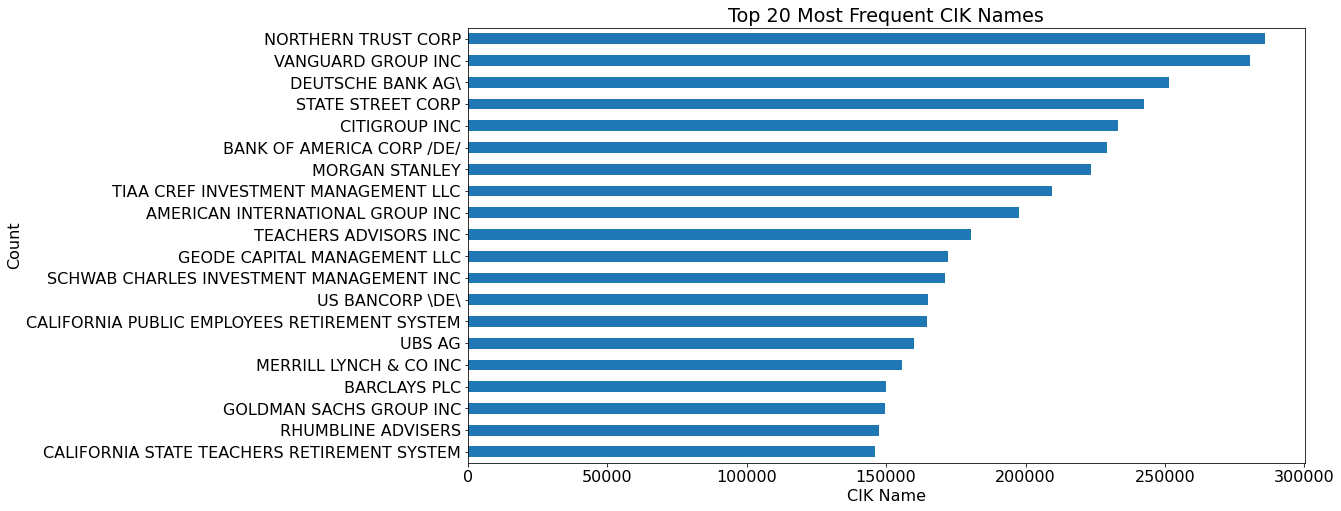

In [38]:
import matplotlib.pyplot as plt

top_20_ciknames = top_20_ciknames.sort_values(ascending=True)

plt.figure(figsize=(15, 8))
top_20_ciknames.plot(kind='barh')
plt.xlabel('CIK Name')
plt.ylabel('Count')
plt.title('Top 20 Most Frequent CIK Names')
plt.xticks()
plt.show()


In [45]:
cikname_counts.tail(1000)

cikname
SATOHA MANAGEMENT L P                             37
STARR INTERNATIONAL CO INC                        37
MITSUBISHI UFJ SECURITIES (USA) INC               37
FINANCIAL SENSE ADVISORS INC                      37
KG FUNDS MANAGEMENT LLC                           37
                                                  ..
GRAMERCY INVESTMENT ADVISORS LLC                   1
ENCAP ENERGY CAPITAL FUND VIII LP                  1
ENCAP ENERGY CAPITAL FUND VIII CO-INVESTORS LP     1
ENCAP ENERGY CAPITAL FUND IX LP                    1
TANNENBAUM JEFFREY                                 1
Name: count, Length: 1000, dtype: int64

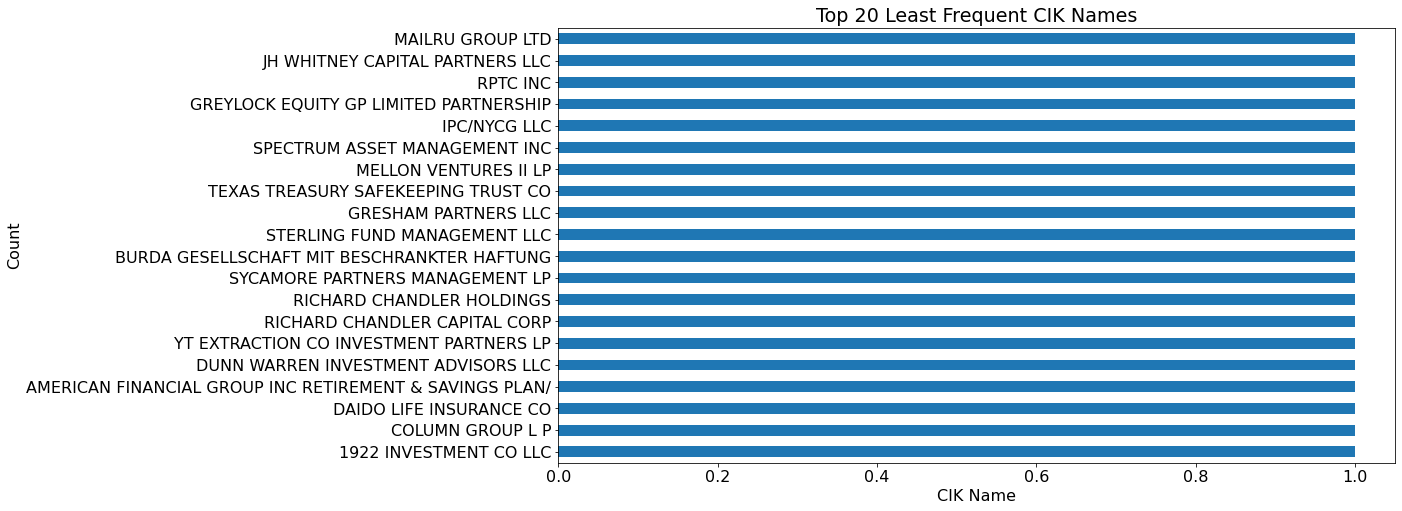

In [51]:
import matplotlib.pyplot as plt

cikname_counts = merged_df['cikname'].value_counts()
bot_20_ciknames = cikname_counts.iloc[-70:-50]


bot_20_ciknames = bot_20_ciknames.sort_values(ascending=True)

plt.figure(figsize=(15, 8))
bot_20_ciknames.plot(kind='barh')
plt.xlabel('CIK Name')
plt.ylabel('Count')
plt.title('Top 20 Least Frequent CIK Names')
plt.xticks()
plt.show()


In [ ]:
# Set the figure size to make the plot wider
plt.figure(figsize=(15, 5))  # Width, Height in inches

# Plot the histogram
plt.bar(delay_counts.index, delay_counts.values, width=1.0, edgecolor='black')

# Set the x-axis labels with a step of 5
plt.xticks(range(min(delay_counts.index), max(delay_counts.index) + 1, 5), rotation=90)

# Set the labels and title
plt.xlabel('Delay (days)')
plt.ylabel('Frequency')
plt.title('Histogram of Filing Delays')

# Show the plot
plt.tight_layout()  # Adjust the padding between and around subplots.

plt.show()


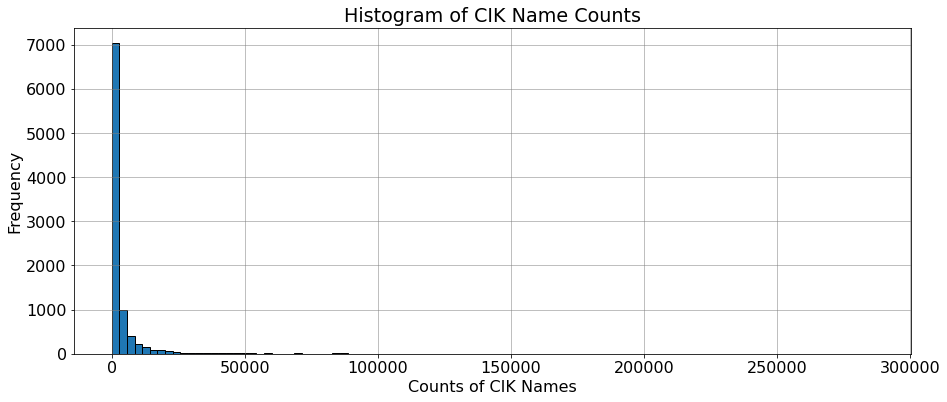

In [58]:
# Assuming cikname_counts is already defined and sorted
plt.figure(figsize=(15, 6))
plt.hist(cikname_counts.values, bins=100, edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Counts of CIK Names')
plt.ylabel('Frequency')
plt.title('Histogram of CIK Name Counts')
plt.grid(True)
plt.show()

In [79]:
import numpy as np

# Calculate the 50th percentile
percentile_50th = np.percentile(cikname_counts, 50)


In [81]:
percentile_50th

767.5

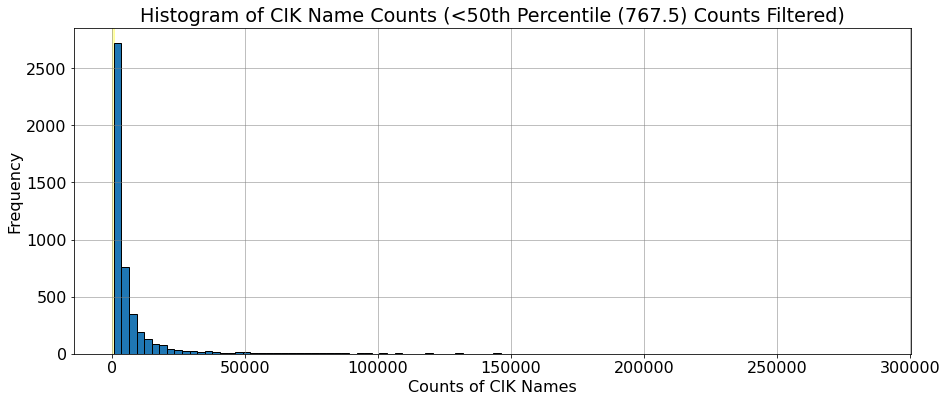

In [82]:
# Filter out extreme values
threshold = percentile_50th
filtered_counts = cikname_counts[cikname_counts >= threshold]

plt.figure(figsize=(15, 6))

plt.axvspan(0, threshold, color='yellow', alpha=0.3, label='0-20000 Excluded')

plt.hist(filtered_counts, bins=100, edgecolor='black')
plt.xlabel('Counts of CIK Names')
plt.ylabel('Frequency')
plt.title('Histogram of CIK Name Counts (<50th Percentile (767.5) Counts Filtered)')

plt.grid(True)
plt.show()


<AxesSubplot:>

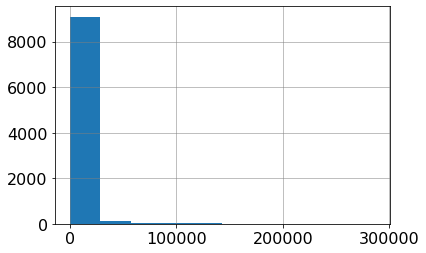

In [53]:
cikname_counts.hist()

cikname information is joined without trouble. only one item was not found and its added now.

# JOIN CUSIP KEY

Cusip info is not available right away so i used sec api.These are all available cusip keys on sec api.
cusip keys has a structure, first 6 digits only denote the issuer name, the other suffixes denote the equity.
therefore we need to strip them to get base cusip key, and join based on this value.

In [38]:
from sec_api import MappingApi
import pandas as pd 
api_key = "d1fae337ec2243809956cb3aa5ef73ff053cb51349c555fcb3d6ebd7893fbc63"
mappingApi = MappingApi(api_key=api_key)

In [39]:
# all NASDAQ traded companies
by_exchange = mappingApi.resolve("exchange", "NASDAQ")
NASDAQ_df = pd.DataFrame(by_exchange)

# all NYSE traded companies
by_exchange = mappingApi.resolve("exchange", "NYSE")
NYSE_df = pd.DataFrame(by_exchange)

# all NYSEMKT traded companies
by_exchange = mappingApi.resolve("exchange", "NYSEMKT")
NYSEMKT_df = pd.DataFrame(by_exchange)

# all NYSEARCA traded companies
by_exchange = mappingApi.resolve("exchange", "NYSEARCA")
NYSEARCA_df = pd.DataFrame(by_exchange)

# all OTC traded companies
by_exchange = mappingApi.resolve("exchange", "OTC")
OTC_df = pd.DataFrame(by_exchange)

# all BATS traded companies
by_exchange = mappingApi.resolve("exchange", "BATS")
BATS_df = pd.DataFrame(by_exchange)

# all INDEX traded companies
by_exchange = mappingApi.resolve("exchange", "INDEX")
INDEX_df = pd.DataFrame(by_exchange)


# CREATE A DF BASED ON ALL EXCHANGES STOCKS AVALABLE IN SEC API
NASDAQ_df.shape, NYSE_df.shape , NYSEMKT_df.shape , NYSEARCA_df.shape , OTC_df.shape, BATS_df.shape , INDEX_df.shape
frames = [NASDAQ_df, NYSE_df, NYSEMKT_df, NYSEARCA_df, OTC_df, BATS_df, INDEX_df]

all_exchanges = pd.concat(frames)

In [40]:
# remove some columns
columns = ["name","ticker","cik","cusip","exchange","category","sector","industry","sicSector","sicIndustry","location"]
all_exchanges = all_exchanges[columns]
all_exchanges.head()

,name,ticker,cik,cusip,exchange,category,sector,industry,sicSector,sicIndustry,location
0,ADMIRALTY BANCORP INC,AAAB,1066808,007231103,NASDAQ,Domestic Common Stock,Financial Services,Banks - Regional,Finance Insurance And Real Estate,State Commercial Banks,Florida; U.S.A
1,ADVANCED ACCELERATOR APPLICATIONS SA,AAAP,1611787,00790T100,NASDAQ,ADR Common Stock,Healthcare,Biotechnology,Manufacturing,Pharmaceutical Preparations,France
2,ACCESS ANYTIME BANCORP INC,AABC,1024015,00431F105,NASDAQ,Domestic Common Stock,Financial Services,Banks - Regional,Finance Insurance And Real Estate,Savings Institution Federally Chartered,New Mexico; U.S.A
3,ALLIANCE ATLANTIS COMMUNICATIONS INC,AACB,1005887,01853E204 01855R302,NASDAQ,Canadian Common Stock,Communication Services,Entertainment,Services,Services-Motion Picture & Video Tape Production,Ontario; Canada
4,ASSET ACCEPTANCE CAPITAL CORP,AACC,1264707,04543P100,NASDAQ,Domestic Common Stock,Financial Services,Asset Management,Finance Insurance And Real Estate,Short-Term Business Credit Institutions,Michigan; U.S.A


In [41]:
all_exchanges.iloc[3,3]

'01853E204 01855R302'

In [42]:
# Define a function to get the first 6 characters of each CUSIP and join them with a space
def get_base_cusips(cusip_string):
    # Split the string by space, take the first 6 characters of each, and join with space
    return ' '.join([cusip[:6] for cusip in cusip_string.split()])

# Apply the function to the 'cusip' column and create a new 'base_cusips' column
all_exchanges['base_cusips'] = all_exchanges['cusip'].apply(get_base_cusips)

In [43]:
all_exchanges.head()

,name,ticker,cik,cusip,exchange,category,sector,industry,sicSector,sicIndustry,location,base_cusips
0,ADMIRALTY BANCORP INC,AAAB,1066808,007231103,NASDAQ,Domestic Common Stock,Financial Services,Banks - Regional,Finance Insurance And Real Estate,State Commercial Banks,Florida; U.S.A,007231
1,ADVANCED ACCELERATOR APPLICATIONS SA,AAAP,1611787,00790T100,NASDAQ,ADR Common Stock,Healthcare,Biotechnology,Manufacturing,Pharmaceutical Preparations,France,00790T
2,ACCESS ANYTIME BANCORP INC,AABC,1024015,00431F105,NASDAQ,Domestic Common Stock,Financial Services,Banks - Regional,Finance Insurance And Real Estate,Savings Institution Federally Chartered,New Mexico; U.S.A,00431F
3,ALLIANCE ATLANTIS COMMUNICATIONS INC,AACB,1005887,01853E204 01855R302,NASDAQ,Canadian Common Stock,Communication Services,Entertainment,Services,Services-Motion Picture & Video Tape Production,Ontario; Canada,01853E 01855R
4,ASSET ACCEPTANCE CAPITAL CORP,AACC,1264707,04543P100,NASDAQ,Domestic Common Stock,Financial Services,Asset Management,Finance Insurance And Real Estate,Short-Term Business Credit Institutions,Michigan; U.S.A,04543P


In [46]:
# Split the 'base_cusips' column into a list of base CUSIPs
all_exchanges['base_cusips'] = all_exchanges['base_cusips'].str.split()

# Explode the 'base_cusips' column into multiple rows
all_exchanges_exploded = all_exchanges.explode('base_cusips')

# Rename the 'base_cusips' column to 'base_cusip'
all_exchanges_exploded.rename(columns={'base_cusips': 'base_cusip'}, inplace=True)

In [48]:
all_exchanges_exploded.head(6)

,name,ticker,cik,cusip,exchange,category,sector,industry,sicSector,sicIndustry,location,base_cusip
0,ADMIRALTY BANCORP INC,AAAB,1066808,007231103,NASDAQ,Domestic Common Stock,Financial Services,Banks - Regional,Finance Insurance And Real Estate,State Commercial Banks,Florida; U.S.A,007231
1,ADVANCED ACCELERATOR APPLICATIONS SA,AAAP,1611787,00790T100,NASDAQ,ADR Common Stock,Healthcare,Biotechnology,Manufacturing,Pharmaceutical Preparations,France,00790T
2,ACCESS ANYTIME BANCORP INC,AABC,1024015,00431F105,NASDAQ,Domestic Common Stock,Financial Services,Banks - Regional,Finance Insurance And Real Estate,Savings Institution Federally Chartered,New Mexico; U.S.A,00431F
3,ALLIANCE ATLANTIS COMMUNICATIONS INC,AACB,1005887,01853E204 01855R302,NASDAQ,Canadian Common Stock,Communication Services,Entertainment,Services,Services-Motion Picture & Video Tape Production,Ontario; Canada,01853E
3,ALLIANCE ATLANTIS COMMUNICATIONS INC,AACB,1005887,01853E204 01855R302,NASDAQ,Canadian Common Stock,Communication Services,Entertainment,Services,Services-Motion Picture & Video Tape Production,Ontario; Canada,01855R
4,ASSET ACCEPTANCE CAPITAL CORP,AACC,1264707,04543P100,NASDAQ,Domestic Common Stock,Financial Services,Asset Management,Finance Insurance And Real Estate,Short-Term Business Credit Institutions,Michigan; U.S.A,04543P


In [44]:
merged_df['base_cusip'] = merged_df['cusip'].str[:6]

In [45]:
merged_df.head()

,cik,cusip,shares,rdate,fdate,filetype,diffs,category,delay,cikname,base_cusip
0,3520,00030710,15100.0,2015-06-30,2015-08-14,13F-HR,15100.0,Buy,45,FRED ALGER MANAGEMENT INC,000307
1,5272,00030710,3615.0,2014-12-31,2015-02-13,13F-HR,3615.0,Neutral,44,AMERICAN INTERNATIONAL GROUP INC,000307
2,5272,00030710,4665.0,2015-06-30,2015-08-12,13F-HR,1050.0,Neutral,43,AMERICAN INTERNATIONAL GROUP INC,000307
3,5272,00030710,5170.0,2015-09-30,2015-11-12,13F-HR,505.0,Neutral,43,AMERICAN INTERNATIONAL GROUP INC,000307
4,5272,00030710,5162.0,2015-12-31,2016-02-11,13F-HR,-8.0,Neutral,42,AMERICAN INTERNATIONAL GROUP INC,000307


## BEFORE MERGING THESE TWO DATAFRAMES. LETS SAVE THEM BECAUSE THEY ARE TOO LARGE NOW, AND CANT FIT INTO RAM

In [50]:
merged_df.to_csv("processed_interactions.csv")
all_exchanges_exploded.to_csv("processed_cusips.csv")